# Heart disease classification

The project in this notebook examines multiple machine learning methods with the goal of building a model capable of correctly classifying whether or not a patient has heart disease based on their medical attributes.

Project approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modeling

## 1. Problem Definition

> Can we predict whether or not a patient has heart disease given a set of their clinical attributes?

## 2. Data

The is a subset of 14 attributes from the Cleveland database made publicly available via the UCI Machine Learning Repository.
https://archive.ics.uci.edu/ml/datasets/heart+disease

## 3. Evaluation

> This proof of concept will be deemed successful if a model achieves an accuracy of at least 95% in classifying whether or not a patient has heart disease (as evaluated against holdout testing data).

## 4. Features

* `age`: age in years
* `sex`: 1 = male; 0 = female
* `cp`: chest pain type
* `trestbps`: resting blood pressure (in mm Hg on admission to hospital)
* `chol`: serum cholestoral in mg/dl
* `fbs`: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
* `restecg`: resting electrocardiographic results
* `thalach`: maximum heart rate achieved
* `exang`: exercise induced angina (1 = yes; 0 = no)
* `oldpeak`: ST depression induced by exercise relative to rest
* `slope`: the slope of the peak exercise ST segment
* `ca`: number of major vessels (0-3) colored by flourosopy
* `thal`: 0 = normal; 1 = fixed defect; 2 = reversable defect
* `target`: has heart disease or not (1 = yes; 0 = no)

## Import libraries

In [87]:
# Exploratory data analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load data

In [2]:
df = pd.read_csv('heart-disease.csv')

## Data exploration

In [3]:
df.shape

(303, 14)

In [4]:
df.head(10)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   
5   57    1   0       140   192    0        1      148      0      0.4      1   
6   56    0   1       140   294    0        0      153      0      1.3      1   
7   44    1   1       120   263    0        1      173      0      0.0      2   
8   52    1   2       172   199    1        1      162      0      0.5      2   
9   57    1   2       150   168    0        1      174      0      1.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
5   0     1       1  
6   0     2       1  
7   0     3       1  
8   0     3       1  
9   0     2       1

In [5]:
df.tail(10)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
293   67    1   2       152   212    0        0      150      0      0.8   
294   44    1   0       120   169    0        1      144      1      2.8   
295   63    1   0       140   187    0        0      144      1      4.0   
296   63    0   0       124   197    0        1      136      1      0.0   
297   59    1   0       164   176    1        0       90      0      1.0   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
293      1   0     3       0  
294      0   0     1       0  
295      2   2     3       0  
296      1   0     2       0  
297      1   2     1       0  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0

In [6]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

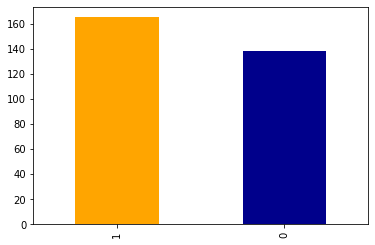

In [7]:
df["target"].value_counts().plot(kind="bar", color=["orange", "darkblue"]);

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [11]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [12]:
pd.crosstab(df.target, df.sex)

sex      0    1
target         
0       24  114
1       72   93

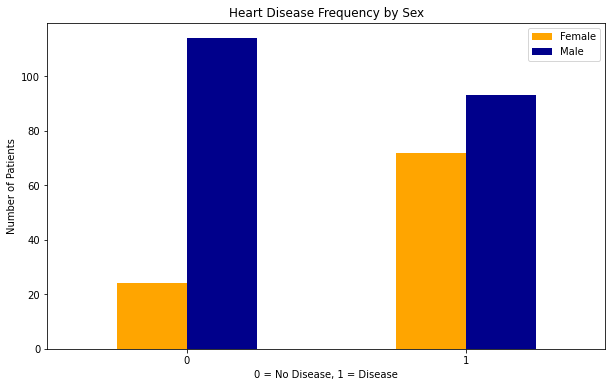

In [13]:
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["orange", "darkblue"])

plt.title("Heart Disease Frequency by Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Number of Patients")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

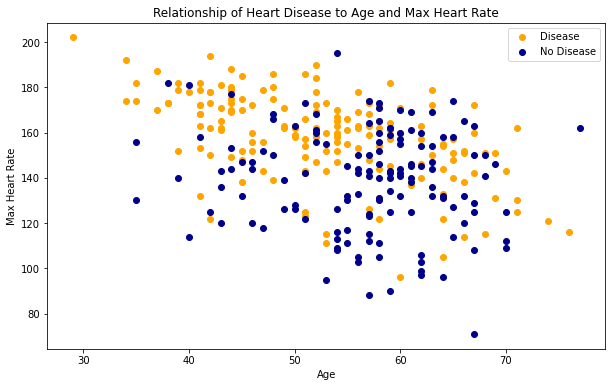

In [14]:
plt.figure(figsize=(10, 6))

plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="orange")

plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="darkblue")

plt.title("Relationship of Heart Disease to Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

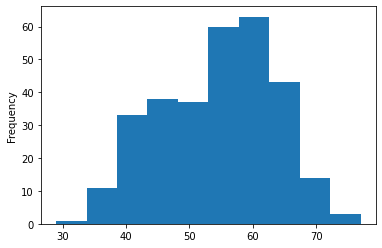

In [15]:
df.age.plot.hist();

In [16]:
pd.crosstab(df.cp, df.target)

target    0   1
cp             
0       104  39
1         9  41
2        18  69
3         7  16

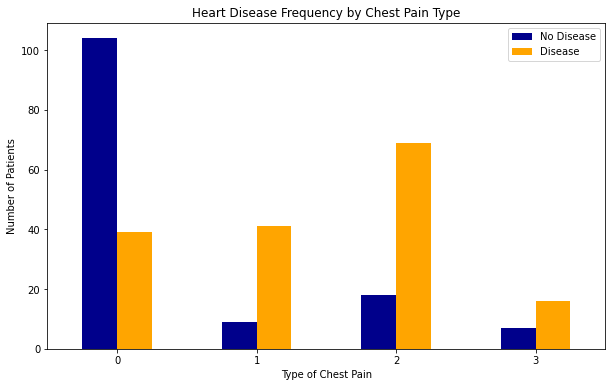

In [17]:
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                   figsize=(10, 6),
                                   color = ["darkblue", "orange"]);

plt.title("Heart Disease Frequency by Chest Pain Type")
plt.xlabel("Type of Chest Pain")
plt.ylabel("Number of Patients")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [18]:
df.corr()

age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.032019   
target   -0.225439 -0.280937  0.433798 -0.144931 -0.085239 -0.028046   

           restecg   thalach     exang   oldpeak     slope        ca  \
age      -0.116211 -0.398522  0.096801  0.210013 -0.168814  0.276326   
sex      -0.058196 -0.044020  0.141664  0.096093 -0.030711  0.118261   
cp        0.044421  0.295762 -0.394280 -0.149230  0.119717 -0.181053   
trestbps -0.114103 -0.046698  0.067616  0.193216 -0.121475  0.101389   
chol     -0.151040 -0.009940  0.067023  0.053952 -0.004038  0.070511   
fbs      -0.084189 -0.008567  0.025665  0.005747 -0.059894  0.137979   
restecg   1.000000  0.044123 -0.070733 -0.058770  0.093045 -0.072042   
thalach   0.044123  1.000000 -0.378812 -0.344187  0.386784 -0.213177   
exang    -0.070733 -0.378812  1.000000  0.288223 -0.257748  0.115739   
oldpeak  -0.058770 -0.344187  0.288223  1.000000 -0.577537  0.222682   
slope     0.093045  0.386784 -0.257748 -0.577537  1.000000 -0.080155   
ca       -0.072042 -0.213177  0.115739  0.222682 -0.080155  1.000000   
thal     -0.011981 -0.096439  0.206754  0.210244 -0.104764  0.151832   
target    0.137230  0.421741 -0.436757 -0.430696  0.345877 -0.391724   

              thal    target  
age       0.068001 -0.225439  
sex       0.210041 -0.280937  
cp       -0.161736  0.433798  
trestbps  0.062210 -0.144931  
chol      0.098803 -0.085239  
fbs      -0.032019 -0.028046  
restecg  -0.011981  0.137230  
thalach  -0.096439  0.421741  
exang     0.206754 -0.436757  
oldpeak   0.210244 -0.430696  
slope    -0.104764  0.345877  
ca        0.151832 -0.391724  
thal      1.000000 -0.344029  
target   -0.344029  1.000000

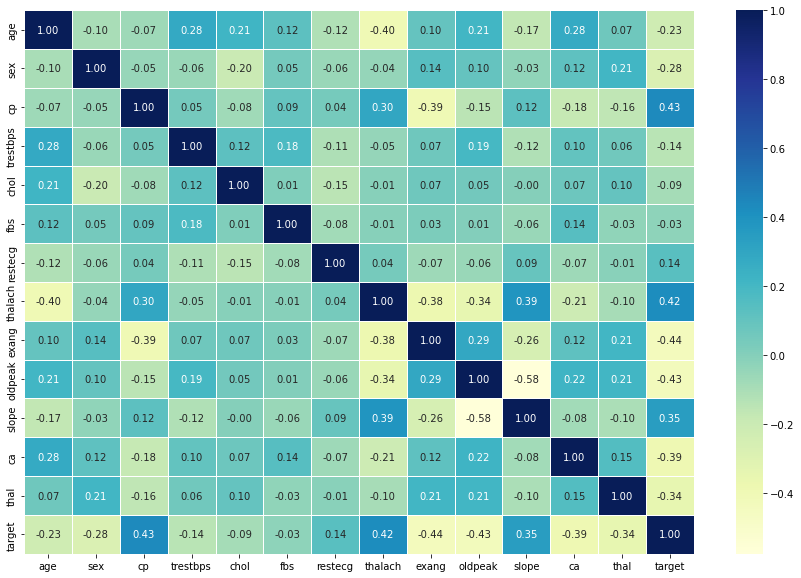

In [19]:
# Plot correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

## 5. Modeling

In [20]:
# Split data into feature matrix (X) and labels (y)
X = df.drop("target", axis=1)
y = df["target"]

In [21]:
X

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0     2  
3        2   0     2  
4        2   0     2  
..     ...  ..   ...  
298      1   0     3  
299      1   0     3  
300      1   2     3  
301      1   1     3  
302      1   1     2  

[303 rows x 13 columns]

In [22]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [23]:
# Split data into training and testing partitions
np.random.seed(1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
X_train

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
62    52    1   3       118   186    0        0      190      0      0.0   
127   67    0   2       152   277    0        1      172      0      0.0   
111   57    1   2       150   126    1        1      173      0      0.2   
287   57    1   1       154   232    0        0      164      0      0.0   
108   50    0   1       120   244    0        1      162      0      1.1   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
203   68    1   2       180   274    1        0      150      1      1.6   
255   45    1   0       142   309    0        0      147      1      0.0   
72    29    1   1       130   204    0        0      202      0      0.0   
235   51    1   0       140   299    0        1      173      1      1.6   
37    54    1   2       150   232    0        0      165      0      1.6   

     slope  ca  thal  
62       1   0     1  
127      2   1     2  
111      2   1     3  
287      2   1     2  
108      2   0     2  
..     ...  ..   ...  
203      1   0     3  
255      1   3     3  
72       2   0     2  
235      2   0     3  
37       2   0     3  

[242 rows x 13 columns]

In [25]:
y_train

62     1
127    1
111    1
287    0
108    1
      ..
203    0
255    0
72     1
235    0
37     1
Name: target, Length: 242, dtype: int64

In [36]:
models = {"LR": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "RF": RandomForestClassifier()}

def fit_and_score_clf(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates provided classification estimators.
    models: a dictionary containing Scikit-Learn classifiers
    X_train: training data without labels
    X_test: testing data without labels
    y_train: labels for training data
    y_test: labels for testing data
    """
    np.random.seed(1)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [37]:
model_scores = fit_and_score_clf(models, X_train, X_test, y_train, y_test)
model_scores

C:\Users\kylek\Python_Projects\heart-disease-classification\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LR': 0.7704918032786885, 'KNN': 0.5737704918032787, 'RF': 0.8032786885245902}

### Baseline Model Comparison

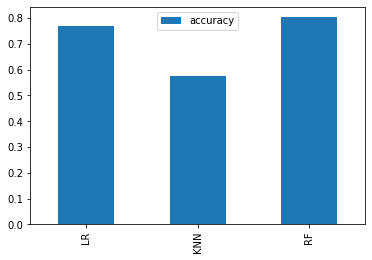

In [41]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

### Hyperparameter Tuning

In [62]:
# Tune baseline KNN model

train_scores = []
test_scores = []

neighbors = range(1, 21)

np.random.seed(1)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [63]:
train_scores

[1.0,
 0.8264462809917356,
 0.7933884297520661,
 0.7975206611570248,
 0.7768595041322314,
 0.78099173553719,
 0.756198347107438,
 0.743801652892562,
 0.7231404958677686,
 0.731404958677686,
 0.731404958677686,
 0.7231404958677686,
 0.7148760330578512,
 0.7066115702479339,
 0.7107438016528925,
 0.71900826446281,
 0.6942148760330579,
 0.6983471074380165,
 0.7107438016528925,
 0.7107438016528925]

In [64]:
test_scores

[0.4918032786885246,
 0.4918032786885246,
 0.5737704918032787,
 0.5409836065573771,
 0.5737704918032787,
 0.5737704918032787,
 0.5737704918032787,
 0.5901639344262295,
 0.5901639344262295,
 0.5737704918032787,
 0.5737704918032787,
 0.5737704918032787,
 0.5737704918032787,
 0.5737704918032787,
 0.6229508196721312,
 0.6229508196721312,
 0.6065573770491803,
 0.639344262295082,
 0.6065573770491803,
 0.6229508196721312]

Max test score: 63.93%


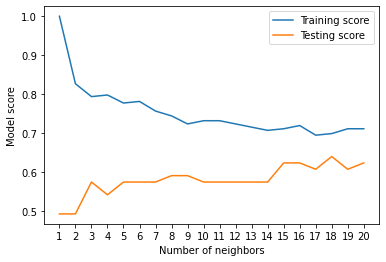

In [65]:
plt.plot(neighbors, train_scores, label="Training score")
plt.plot(neighbors, test_scores, label="Testing score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Max test score: {max(test_scores)*100:.2f}%")

In [66]:
# Hyperparameter grid for logistic regression
lr_grid = {"C": np.logspace(-4, 4, 20),
           "solver": ["liblinear"]}

# Hyperparameter grid for random forest
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [68]:
# Tune baseline logistic regression model with RandomizedSearchCV
np.random.seed(1)

rs_lr = RandomizedSearchCV(LogisticRegression(),
                           param_distributions=lr_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

rs_lr.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [69]:
rs_lr.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [70]:
rs_lr.score(X_test, y_test)

0.7704918032786885

In [71]:
# Tune baseline random forest model with RandomizedSearchCV
np.random.seed(1)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [72]:
rs_rf.best_params_

{'n_estimators': 860,
 'min_samples_split': 12,
 'min_samples_leaf': 17,
 'max_depth': 5}

In [73]:
rs_rf.score(X_test, y_test)

0.7868852459016393

In [74]:
# Tune logistic regression model with GridSearchCV
lr_grid = {"C": np.logspace(-4, 4, 30),
           "solver": ["liblinear"]}

gs_lr = GridSearchCV(LogisticRegression(),
                     param_grid=lr_grid,
                     cv=5,
                     verbose=True)

gs_lr.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [75]:
gs_lr.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [76]:
gs_lr.score(X_test, y_test)

0.7704918032786885

In [80]:
# Tune random forest model with GridSearchCV
rf_grid = {"n_estimators": np.arange(700, 1000, 100),
           "max_depth": [5],
           "min_samples_split": np.arange(10, 14, 2),
           "min_samples_leaf": np.arange(14, 18, 2)}

gs_rf = GridSearchCV(RandomForestClassifier(),
                     param_grid=rf_grid,
                     cv=5,
                     verbose=True)

gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5], 'min_samples_leaf': array([14, 16]),
                         'min_samples_split': array([10, 12]),
                         'n_estimators': array([700, 800, 900])},
             verbose=True)

In [81]:
gs_rf.best_params_

{'max_depth': 5,
 'min_samples_leaf': 14,
 'min_samples_split': 10,
 'n_estimators': 700}

In [83]:
gs_rf.score(X_test, y_test)

0.8032786885245902

### Model Evaluation

In [85]:
# Make predictions using logistic regression model
y_preds = gs_lr.predict(X_test)
y_preds

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

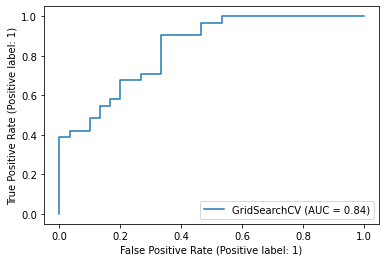

In [88]:
# Plot ROC curve and calculate AUC
RocCurveDisplay.from_estimator(gs_lr, X_test, y_test)

In [89]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[20 10]
 [ 4 27]]


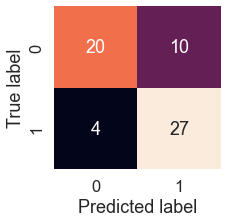

In [91]:
sns.set(font_scale=1.5)

def plot_confusion_matrix(y_test, y_preds):
    """
    Plots a confusion matrix given a set of predicted labels (y_preds)
    and true values (t_test).
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
plot_confusion_matrix(y_test, y_preds)

In [92]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.67      0.74        30
           1       0.73      0.87      0.79        31

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



In [93]:
gs_lr.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [94]:
clf = LogisticRegression(C=0.38566204211634725, solver='liblinear')

In [102]:
# Cross-validation accuracy
cv_acc = np.mean(cross_val_score(clf, X, y, cv=5, scoring="accuracy"))
cv_acc

0.8380874316939891

In [103]:
# Cross-validation precision
cv_prc = np.mean(cross_val_score(clf, X, y, cv=5, scoring="precision"))
cv_prc

0.8154667272314331

In [104]:
# Cross-validation recall
cv_rec = np.mean(cross_val_score(clf, X, y, cv=5, scoring="recall"))
cv_rec

0.9151515151515153

In [105]:
# Cross-validation f1-score
cv_f1 = np.mean(cross_val_score(clf, X, y, cv=5, scoring="f1"))
cv_f1

0.8614850462777628

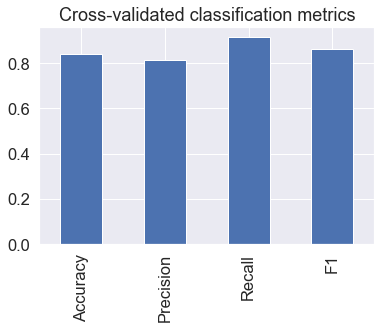

In [108]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_prc, 
                           "Recall": cv_rec,
                           "F1": cv_f1},
                           index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

### Feature Importance

In [111]:
# Feature importance for tuned logistic regression model
clf.fit(X_train, y_train)
clf.coef_

array([[-0.00159735, -1.39593453,  0.92734589, -0.02018937, -0.00269665,
         0.06814244,  0.5155538 ,  0.03413803, -0.72024755, -0.5952922 ,
         0.19052501, -0.59478692, -0.36218158]])

In [112]:
features = dict(zip(df.columns, list(clf.coef_[0])))
features

{'age': -0.0015973529197282612,
 'sex': -1.3959345292022007,
 'cp': 0.9273458929368423,
 'trestbps': -0.020189367622519085,
 'chol': -0.0026966468637392217,
 'fbs': 0.06814244127346177,
 'restecg': 0.5155537963137398,
 'thalach': 0.03413803135738532,
 'exang': -0.7202475501723903,
 'oldpeak': -0.5952922035772316,
 'slope': 0.19052501005516304,
 'ca': -0.5947869220136607,
 'thal': -0.3621815769850567}

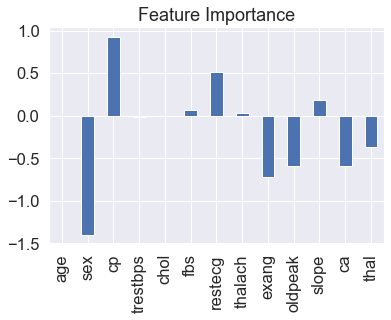

In [114]:
feature_df = pd.DataFrame(features, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);